# Project 12. Computer Vision
Building a Real-Time Object Detector

## Object Detection Tasks
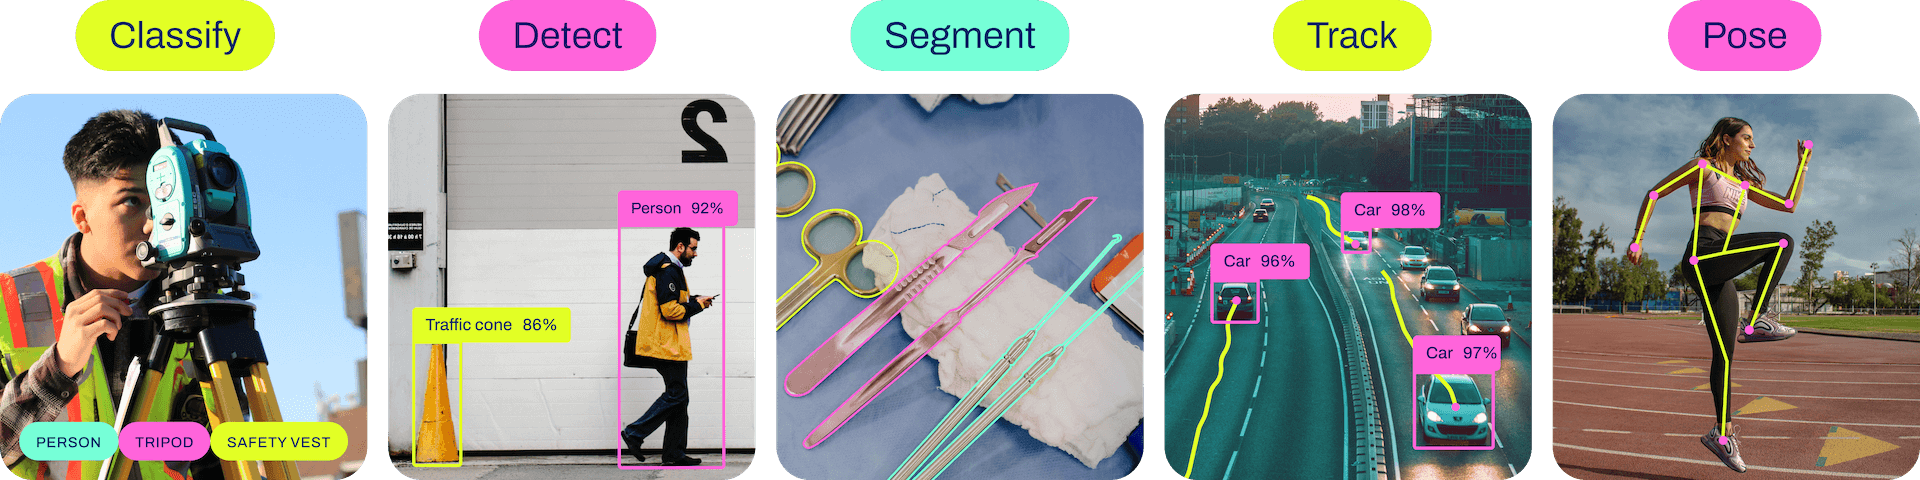

## Haar Cascades

In [ ]:
help(eye_cascade.detectMultiScale)

Help on built-in function detectMultiScale:

detectMultiScale(...) method of cv2.CascadeClassifier instance
    detectMultiScale(image[, scaleFactor[, minNeighbors[, flags[, minSize[, maxSize]]]]]) -> objects
    .   @brief Detects objects of different sizes in the input image. The detected objects are returned as a list
    .       of rectangles.
    .
    .       @param image Matrix of the type CV_8U containing an image where objects are detected.
    .       @param objects Vector of rectangles where each rectangle contains the detected object, the
    .       rectangles may be partially outside the original image.
    .       @param scaleFactor Parameter specifying how much the image size is reduced at each image scale.
    .       @param minNeighbors Parameter specifying how many neighbors each candidate rectangle should have
    .       to retain it.
    .       @param flags Parameter with the same meaning for an old cascade as in the function
    .       cvHaarDetectObjects. It i

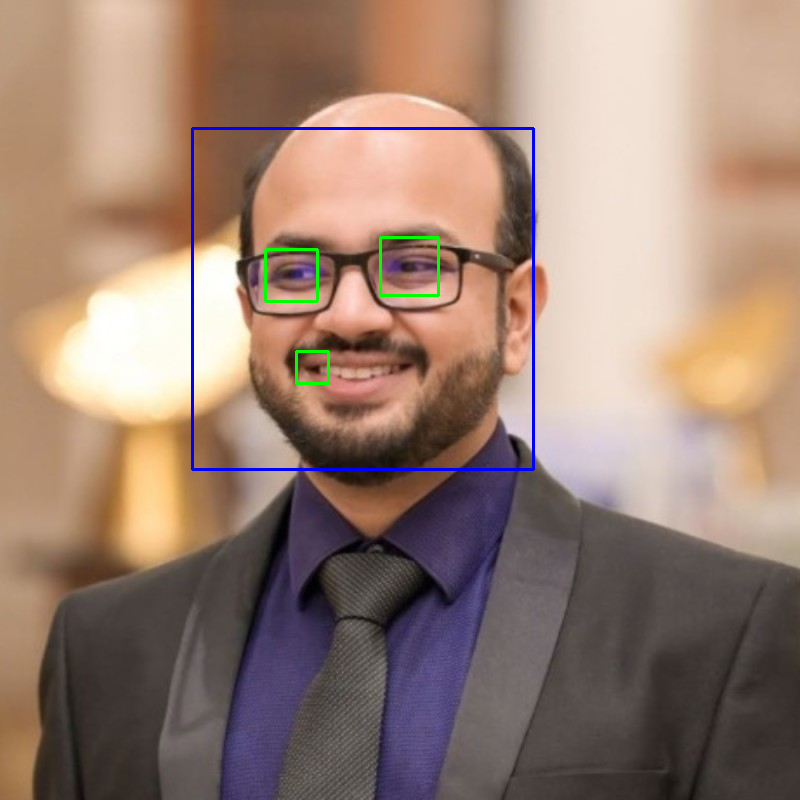

In [ ]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow


face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

img = cv2.imread("1678305318643.jpeg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(gray, 1.7, 1)


for (x,y,w,h) in faces:
    img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray, 1.09)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)

cv2_imshow(img)

## Playing with Yolo v8

### 0. Setup

In [ ]:
!pip install ultralytics

import ultralytics
ultralytics.checks()

Ultralytics 8.4.9 🚀 Python-3.12.12 torch-2.9.0+cpu CPU (Intel Xeon CPU @ 2.20GHz)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 21.2/107.7 GB disk)


### 1. Predict

YOLOv8 may be used directly in the Command Line Interface (CLI) with a `yolo` command for a variety of tasks and modes and accepts additional arguments, i.e. `imgsz=640`. See a full list of available `yolo` [arguments](https://docs.ultralytics.com/usage/cfg/) and other details in the [YOLOv8 Predict Docs](https://docs.ultralytics.com/modes/train/).


In [ ]:
!yolo --help

WARNING ⚠️ argument '--help' does not require leading dashes '--', updating to 'help'.

    Arguments received: ['yolo', '--help']. Ultralytics 'yolo' commands use the following syntax:

        yolo TASK MODE ARGS

        Where   TASK (optional) is one of ['segment', 'detect', 'pose', 'classify', 'obb']
                MODE (required) is one of ['val', 'track', 'export', 'benchmark', 'predict', 'train']
                ARGS (optional) are any number of custom 'arg=value' pairs like 'imgsz=320' that override defaults.
                    See all ARGS at https://docs.ultralytics.com/usage/cfg or with 'yolo cfg'

    1. Train a detection model for 10 epochs with an initial learning_rate of 0.01
        yolo train data=coco8.yaml model=yolo26n.pt epochs=10 lr0=0.01

    2. Predict a YouTube video using a pretrained segmentation model at image size 320:
        yolo predict model=yolo26n-seg.pt source='https://youtu.be/LNwODJXcvt4' imgsz=320

    3. Validate a pretrained detection model a

In [ ]:
!yolo predict model=yolov8n.pt source='https://ultralytics.com/images/zidane.jpg'

Ultralytics 8.4.9 🚀 Python-3.12.12 torch-2.9.0+cpu CPU (Intel Xeon CPU @ 2.20GHz)
YOLOv8n summary (fused): 72 layers, 3,151,904 parameters, 0 gradients, 8.7 GFLOPs

Found https://ultralytics.com/images/zidane.jpg locally at zidane.jpg
image 1/1 /content/zidane.jpg: 384x640 2 persons, 1 tie, 170.9ms
Speed: 5.3ms preprocess, 170.9ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)
Results saved to /content/runs/detect/predict4
💡 Learn more at https://docs.ultralytics.com/modes/predict


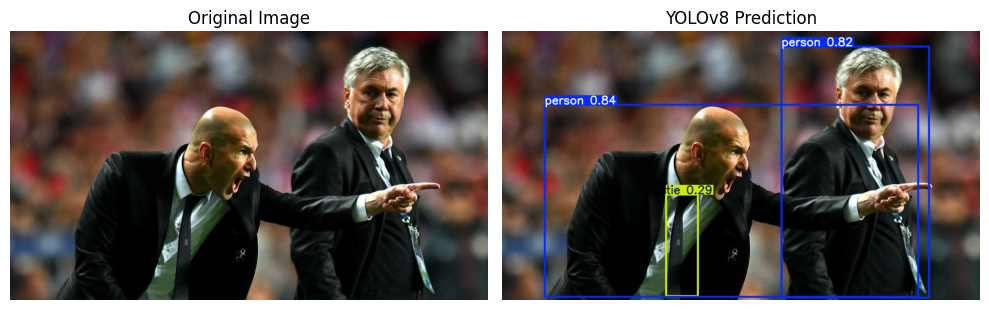

In [ ]:
import matplotlib.pyplot as plt

img1 = cv2.imread("zidane.jpg")
img2 = cv2.imread("/content/runs/detect/predict/zidane.jpg")

img1_rgb = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2_rgb = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Display the images in the subplots
axes[0].imshow(img1_rgb)
axes[0].set_title("Original Image")
axes[0].axis('off') # Hide axes

axes[1].imshow(img2_rgb)
axes[1].set_title("YOLOv8 Prediction")
axes[1].axis('off') # Hide axes

plt.tight_layout() # Adjust layout to prevent overlapping titles
plt.show()

## YOLO26

In [ ]:
!yolo predict model=/content/yolo26n.pt source='https://ultralytics.com/images/bus.jpg'

Ultralytics 8.4.9 🚀 Python-3.12.12 torch-2.9.0+cpu CPU (Intel Xeon CPU @ 2.20GHz)
YOLO26n summary (fused): 122 layers, 2,408,932 parameters, 0 gradients, 5.4 GFLOPs

Found https://ultralytics.com/images/bus.jpg locally at bus.jpg
image 1/1 /content/bus.jpg: 640x480 4 persons, 1 bus, 209.4ms
Speed: 11.1ms preprocess, 209.4ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 480)
Results saved to /content/runs/detect/predict5
💡 Learn more at https://docs.ultralytics.com/modes/predict


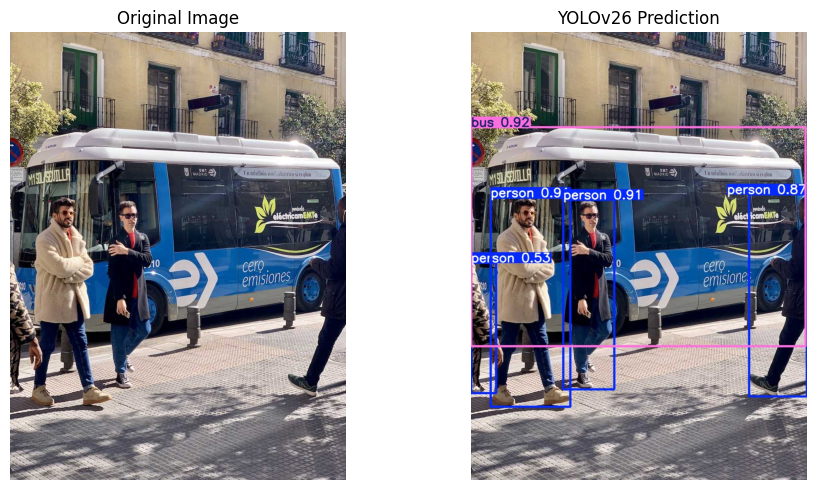

In [ ]:
import matplotlib.pyplot as plt

img1 = cv2.imread("bus.jpg")
img2 = cv2.imread("/content/runs/detect/predict5/bus.jpg")

img1_rgb = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2_rgb = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Display the images in the subplots
axes[0].imshow(img1_rgb)
axes[0].set_title("Original Image")
axes[0].axis('off') # Hide axes

axes[1].imshow(img2_rgb)
axes[1].set_title("YOLOv26 Prediction")
axes[1].axis('off') # Hide axes

plt.tight_layout() # Adjust layout to prevent overlapping titles
plt.show()

In [ ]:
from ultralytics import YOLO

# Load a model
model = YOLO("yolo26n.pt")  # load an official model

# Predict with the model
results = model("https://ultralytics.com/images/bus.jpg")  # predict on an image

# Access the results
for result in results:
    xywh = result.boxes.xywh  # center-x, center-y, width, height
    xywhn = result.boxes.xywhn  # normalized
    xyxy = result.boxes.xyxy  # top-left-x, top-left-y, bottom-right-x, bottom-right-y
    xyxyn = result.boxes.xyxyn  # normalized
    names = [result.names[cls.item()] for cls in result.boxes.cls.int()]  # class name of each box
    confs = result.boxes.conf  # confidence score of each box


image 1/1 /content/bus.jpg: 640x480 4 persons, 1 bus, 187.5ms
Speed: 7.5ms preprocess, 187.5ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 480)


## Processing a video

In [ ]:
! yolo predict model=yolo26n-seg.pt source='https://youtu.be/Qd6uWWd2Yoo?si=iVLGYuhZCv3okEs5' imgsz=320

Ultralytics 8.4.9 🚀 Python-3.12.12 torch-2.9.0+cpu CPU (Intel Xeon CPU @ 2.20GHz)
YOLO26n-seg summary (fused): 139 layers, 2,722,980 parameters, 0 gradients, 9.1 GFLOPs

requirements: Ultralytics requirement ['pytubefix>=6.5.2'] not found, attempting AutoUpdate...
Using Python 3.12.12 environment at: /usr
Resolved 12 packages in 532ms
Prepared 2 packages in 2.46s
Installed 2 packages in 215ms
 + nodejs-wheel-binaries==24.13.0
 + pytubefix==10.3.6

requirements: AutoUpdate success ✅ 3.9s
WARNING ⚠️ requirements: Restart runtime or rerun command for updates to take effect

1/1: https://youtu.be/Qd6uWWd2Yoo?si=iVLGYuhZCv3okEs5... Success ✅ (32689 frames of shape 1920x1080 at 50.00 FPS)

0: 192x320 1 person, 229.7ms
0: 192x320 1 person, 151.1ms
0: 192x320 1 person, 165.8ms
0: 192x320 1 person, 123.8ms
0: 192x320 1 person, 141.1ms
0: 192x320 1 person, 95.3ms
0: 192x320 1 person, 137.2ms
0: 192x320 (no detections), 113.2ms
0: 192x320 (no detections), 120.8ms
0: 192x320 (no detections), 104.6

## Run this & take screenshots

In [ ]:
from ultralytics import YOLO
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

# Load the YOLOv8 model
model = YOLO('yolov8n.pt')

# Open the default camera
cap = cv2.VideoCapture(0)

# Check if camera opened successfully
if not cap.isOpened():
    print("Error: Could not open camera.")
else:
    while True:
        # Read a frame from the camera
        ret, frame = cap.read()

        # If frame is read correctly ret is True
        if not ret:
            print("Error: Can't receive frame (stream end?). Exiting ...")
            break

        # Perform object detection on the frame
        results = model(frame, verbose=False) # Set verbose=False to reduce output

        # Annotate the frame with detection results
        annotated_frame = results[0].plot()

        # Display the annotated frame
        cv2_imshow(annotated_frame)

        # Break the loop if 'q' is pressed
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    # Release the capture and destroy all windows
    cap.release()
    cv2.destroyAllWindows()

Error: Could not open camera.
